[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/ml_intro/HEAD?labpath=notebooks%2F1_data.ipynb)

# Data Standardization & Dimensionality Reduction

## Data Standardization

Before working with your data it is often useful to standardize and de-correlate it.

Let us consider and example of a bivariate normal distribution with the following mean and covariance matrix.

In [1]:
import numpy as np

In [2]:
mu = np.array([1., 1.])
cov = np.array(
    [[0.5, 0.3],
     [0.3, 1.5]]
)
N = 2000

In [3]:
from IPython.display import Markdown as md

In [4]:
msg = "## " + r"$\vec{{\mu}} = \left( \begin{{matrix}} {m1:3.1f} \\ {m2:3.1f} \end{{matrix}} \right)$".format(m1=mu[0], m2=mu[1]) + "\n"
msg += "## " + r"$\Sigma_X = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov[0, 0], C2=cov[0, 1], C3=cov[1, 0], C4=cov[1, 1])
md(msg)

## $\vec{\mu} = \left( \begin{matrix} 1.0 \\ 1.0 \end{matrix} \right)$
## $\Sigma_X = \left[ \begin{matrix} 0.5 & 0.3 \\ 0.3 & 1.5 \end{matrix} \right]$

The covariance matrix has the folllowing appearance.

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_cov(Sigma, title=None):
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111)
    ax.axis("off")
    plot = ax.imshow(Sigma, cmap="inferno", vmin=np.minimum(Sigma.min(), 0))
    cbar = plt.colorbar(plot)
    if title is not None:
        ax.set_title(title)
    fig.tight_layout()

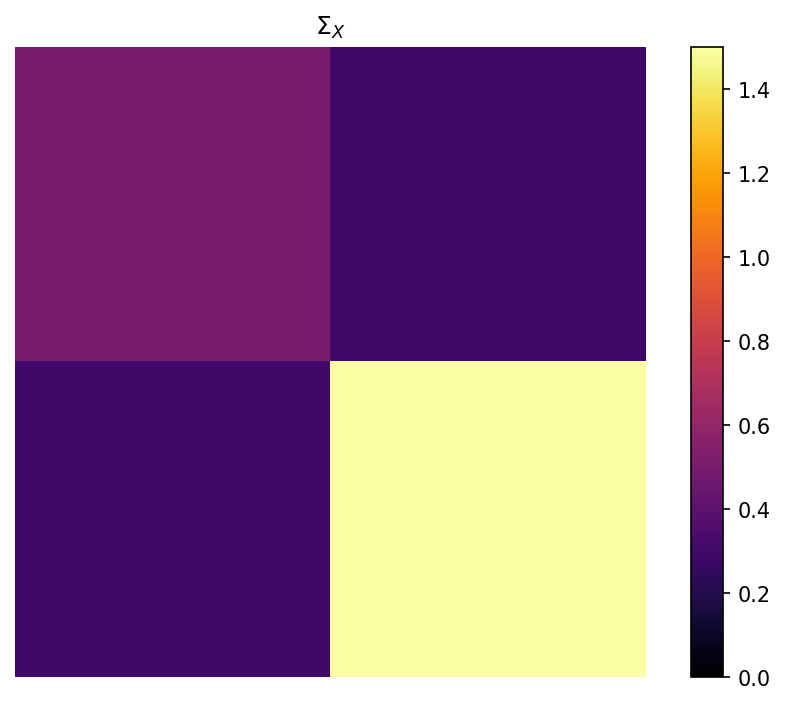

In [7]:
plot_cov(cov, title="$\Sigma_X$")

We now draw a random sample data from these parameters.

In [8]:
X = np.random.multivariate_normal(mu, cov, N)

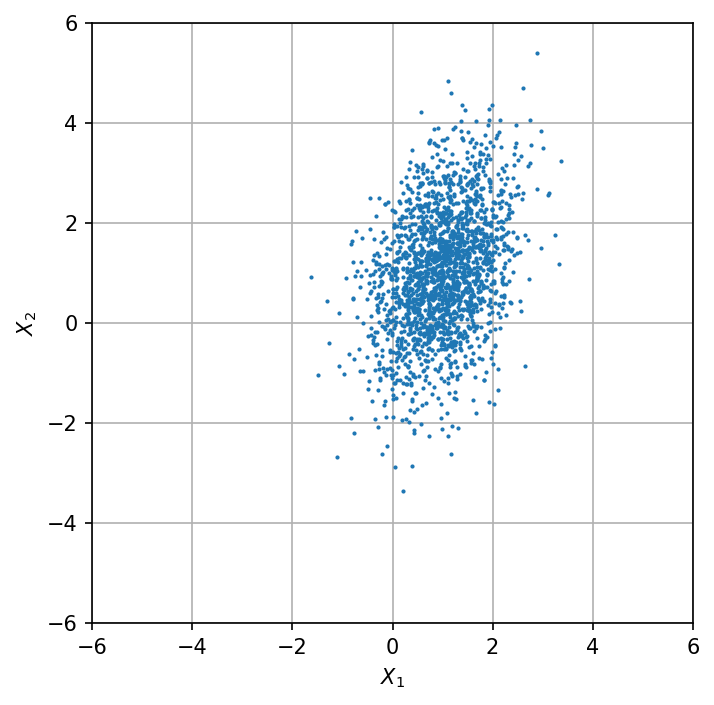

In [9]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1)
ax.plot(X[:, 0], X[:, 1], ".", markersize=2)
ax.set_xlim(-6., 6.)
ax.set_ylim(-6., 6.)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.grid()
fig.tight_layout()

We can confirm that the mean and covariance matrix we calculate from the data are actually what we used as inputs.

The covariance matrix is calculated with

## $\Sigma_X \left( \mathbb{X} \right) = \frac{\left( \mathbb{X}-\mu \right)\cdot\left( \mathbb{X}-\mu \right)^\intercal}{N-1}$

But note for the calculations in these notebooks, that our array `X` is defined such that it is already the transpose of $\mathbb{X}$.

In [10]:
cov_X = (X-X.mean(0)).T @ (X-X.mean(0)) / (N-1)

In [11]:
msg = "## " + r"$\mu = \left( \begin{{matrix}} {m1:3.1f} \\ {m2:3.1f} \end{{matrix}} \right)$".format(m1=X.mean(0)[0], m2=X.mean(0)[1]) + "\n"
msg += "## " + r"$\Sigma_X = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov_X[0, 0], C2=cov_X[0, 1], C3=cov_X[1, 0], C4=cov_X[1, 1])
md(msg)

## $\mu = \left( \begin{matrix} 1.0 \\ 1.0 \end{matrix} \right)$
## $\Sigma_X = \left[ \begin{matrix} 0.5 & 0.3 \\ 0.3 & 1.5 \end{matrix} \right]$

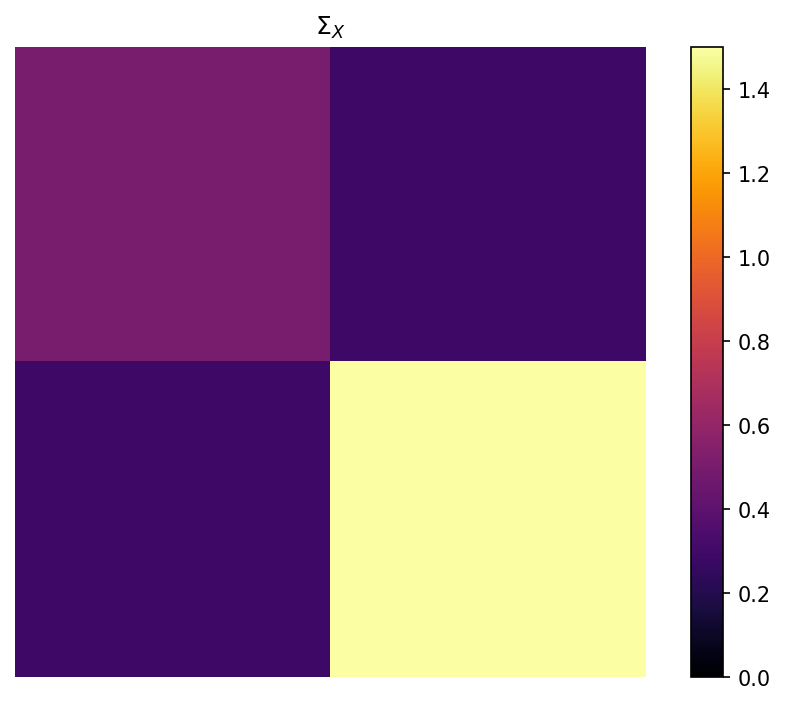

In [12]:
plot_cov(cov_X, title="$\Sigma_X$")

Indeed, the retrieved covariance matrix is identical to our input. With a smaller sample size there could be some deviations.

## Whitening

We are now transforming the data into a reference frame in which the covariance matrix is the identity matrix. This is called **whitening**.

We are first centering our data around zero.

## $\hat{\mathbb{X}} = \mathbb{X} - \mu$

In [13]:
X_mean = X.mean(0)
X_shift = X - X_mean

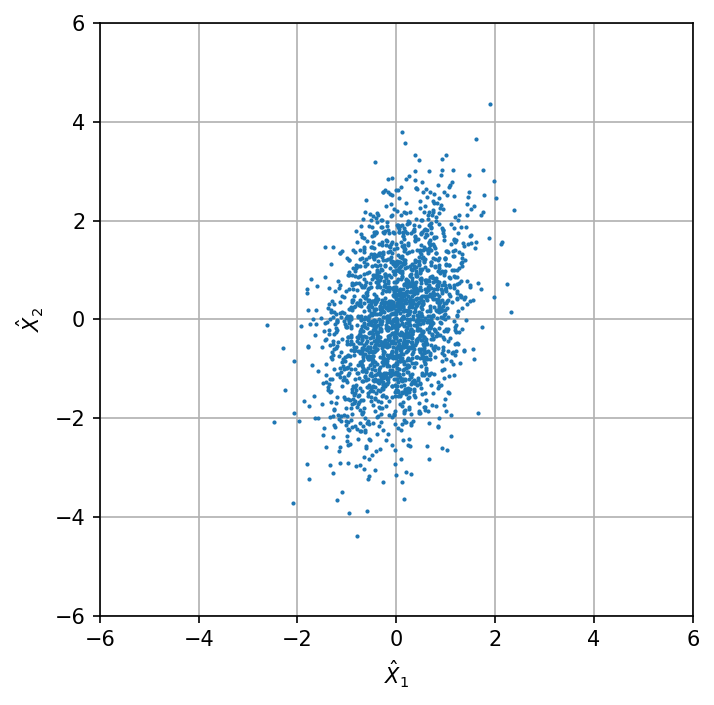

In [14]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1)
ax.plot(X_shift[:, 0], X_shift[:, 1], ".", markersize=2)
ax.set_xlim(-6., 6.)
ax.set_ylim(-6., 6.)
ax.set_xlabel("$\hat{X}_1$")
ax.set_ylabel("$\hat{X}_2$")
ax.grid()
fig.tight_layout()

The covariance matrix is then simply

## $\Sigma_X = \frac{\hat{\mathbb{X}}\cdot\hat{\mathbb{X}}^\intercal}{N-1}$

The task is now to diagonalize this covariance matrix. We are looking for a transformation

## $\mathbb{Y} = \mathbb{W} \cdot \hat{\mathbb{X}}$

such that the covariance matrix of $\mathbb{Y}$ is diagonal. The covariance matrix in the new reference frame is given by

## $\Sigma_Y = \frac{\left[\mathbb{W}\cdot\hat{\mathbb{X}}\right]\cdot\left[\mathbb{W}\cdot\hat{\mathbb{X}}\right]^\intercal}{N-1} = \frac{\mathbb{W}\cdot\hat{\mathbb{X}}\cdot\hat{\mathbb{X}}^\intercal\cdot\mathbb{W}^\intercal}{N-1} = \mathbb{W} \cdot \Sigma_X \cdot \mathbb{W}^\intercal$

### Eigenvalue decomposition

In other words, we have to solve the eigenvalue problem.  
The eigenvalue problem can be written as

## $\Sigma_X \cdot \vec{e}_i = \vec{e}_i \lambda_i$

it can be alternatively written as

## $\Sigma_X \cdot \mathbb{E} = \mathbb{E} \cdot \Lambda$

where the $i$th column of matrix $\mathbb{E}$ is the eigenvector $\vec{e}_i$ and $\Lambda$ is a diagonal matrix with $\Lambda_{ii} = \lambda_i$.

## $\Rightarrow \Sigma_X = \mathbb{E} \cdot \Lambda \cdot \mathbb{E}^{-1}$

Since $\Sigma_X$ is real and symmetric we get

## $\Rightarrow \Sigma_X = \mathbb{E} \cdot \Lambda \cdot \mathbb{E}^\intercal$

Comparing with above gives us

## $\mathbb{W} = \mathbb{E}^\intercal$, $\Sigma_Y = \Lambda$

For this operation there is already the package `numpy.linalg.eig`, that returns the diagonal of $\Lambda$ (the eigenvalues) and the matrix $\mathbb{E}$ (the eigenvectors).

In [15]:
L, E = np.linalg.eig(cov_X)

With $\mathbb{E}$ we can transform our data `X` to `Y` where $\Sigma_Y$ is diagonal. Remeber that we are working with the transposed vectors.

In [16]:
Y_eig = X_shift @ E

This is simply a rotation of our reference frame.

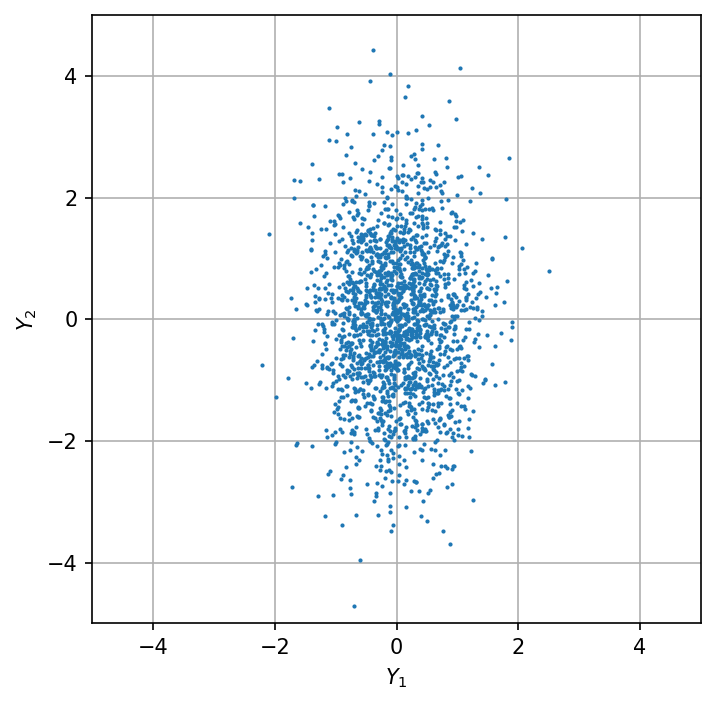

In [17]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_eig[:, 0], Y_eig[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
fig.tight_layout()

We can compute the covariance matrix of `Y` to confirm that it is diagonal.

In [18]:
cov_Y_eig = (Y_eig).T @ (Y_eig) / (N-1)

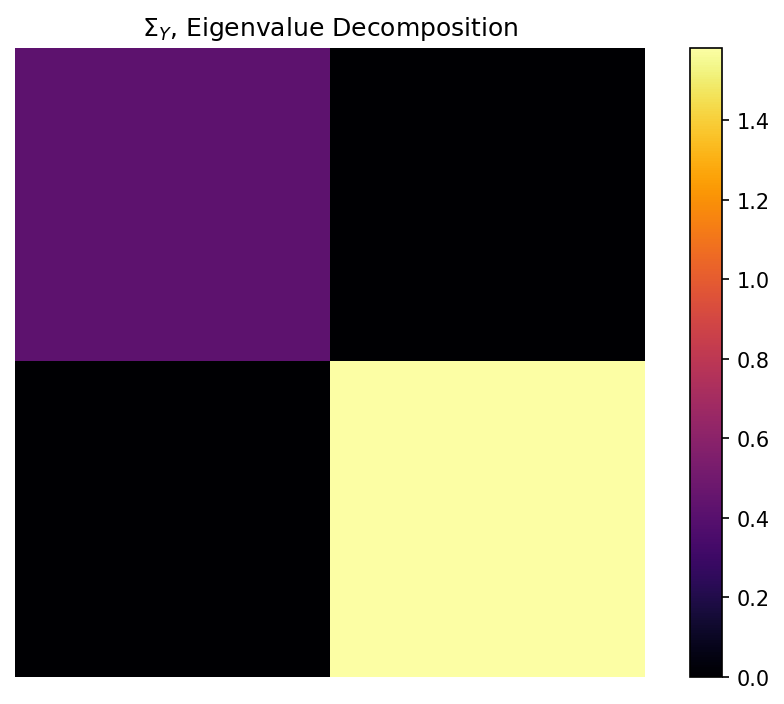

In [19]:
plot_cov(cov_Y_eig, title="$\Sigma_Y$, Eigenvalue Decomposition")

We can furthermore divide the columns of $\mathbb{E}$ by the square roots of their eigenvalues, such the the covariance matrix of $Y$ is the unity matrix.

In [20]:
E_whitened = E @ np.diag((1./np.sqrt(L))) 

In [21]:
Y_eig_whitened = X_shift @ E_whitened

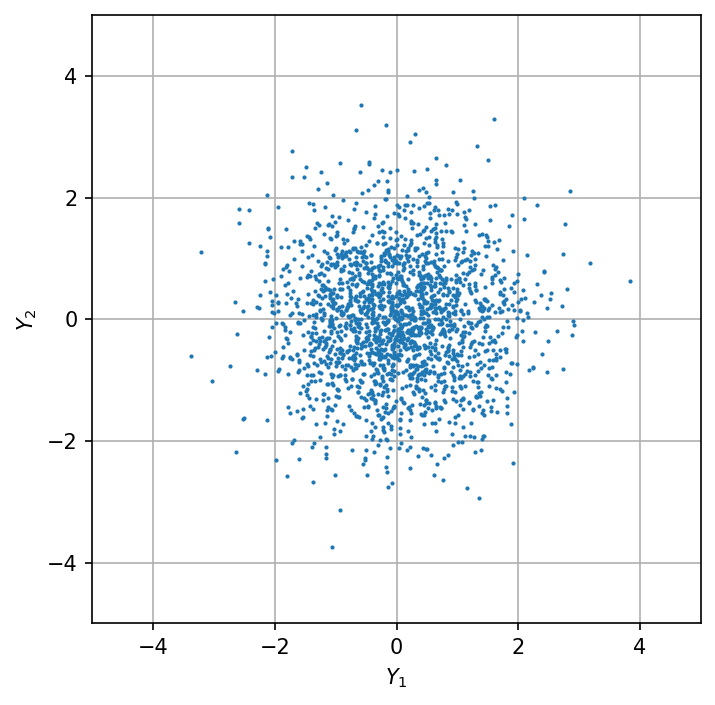

In [22]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_eig_whitened[:, 0], Y_eig_whitened[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
fig.tight_layout()

And confirm that the covariance matrix is indeed the identity matrix.

In [23]:
cov_Y_eig_whitened = Y_eig_whitened.T @ Y_eig_whitened / (N-1)

In [24]:
msg = "## " + r"$\Sigma_Y = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov_Y_eig_whitened[0, 0], C2=cov_Y_eig_whitened[0, 1], C3=cov_Y_eig_whitened[1, 0], C4=cov_Y_eig_whitened[1, 1])
md(msg)

## $\Sigma_Y = \left[ \begin{matrix} 1.0 & 0.0 \\ 0.0 & 1.0 \end{matrix} \right]$

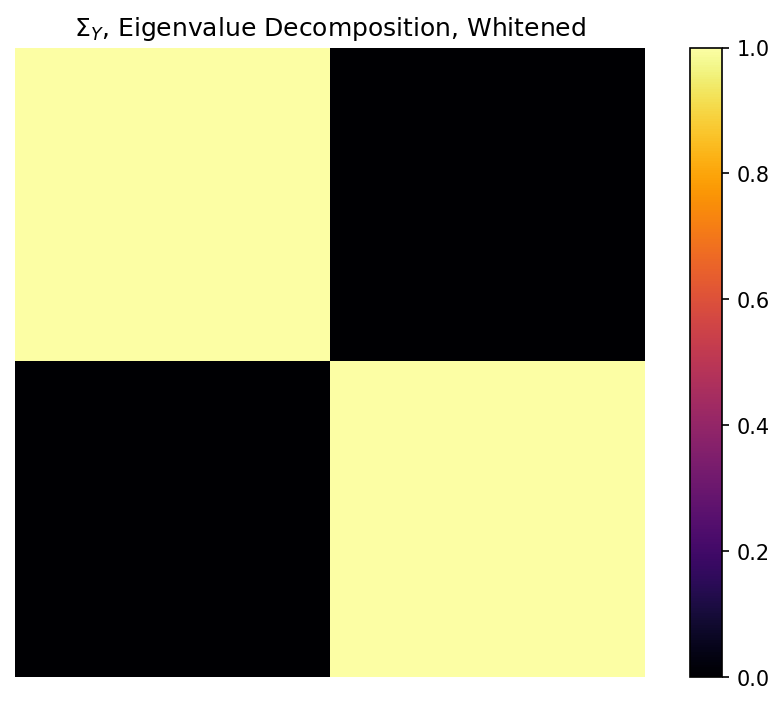

In [25]:
plot_cov(cov_Y_eig_whitened, title="$\Sigma_Y$, Eigenvalue Decomposition, Whitened")

Our data is now successfully whitened.

### Cholesky Decomposition

There are also packages that do the whitening for you, such as Cholesky Whitening.

Whitening means looking for a transformation such that

## $\mathbb{1} = \Sigma_Y = \mathbb{W} \cdot \Sigma_X \cdot \mathbb{W}^\intercal$

## $\Rightarrow \mathbb{W}^{-1} \cdot {\mathbb{W}^\intercal}^{-1} = \left( \mathbb{W}^\intercal \cdot \mathbb{W} \right)^{-1} = \Sigma_X$

## $\Rightarrow \mathbb{W}^\intercal \cdot \mathbb{W} = \Sigma_X^{-1}$

Since covariance matrices are symmetric and positive semi-definite one can do a Cholesky decomposition

## $\Sigma_X^{-1} = \mathbb{L} \cdot \mathbb{L}^* = \mathbb{L} \cdot \mathbb{L}^\intercal$ (if real valued)

where $\mathbb{L}$ is a lower triangular matrix.

## $\Rightarrow \mathbb{W} = \mathbb{L}^\intercal$

For the we can use `numpy.linalg.cholesky`.

In [26]:
L = np.linalg.cholesky(np.linalg.inv(cov_X))

Again, note that our data vector is the transpose.

In [27]:
Y_cholesky = X_shift @ L

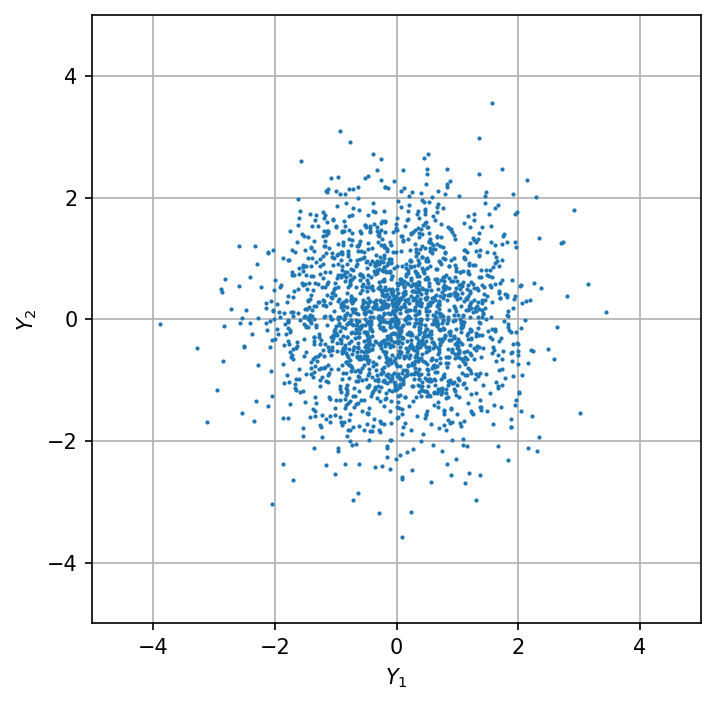

In [28]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_cholesky[:, 0], Y_cholesky[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
fig.tight_layout()

We can again confirm that the covariance matrix is the identity matrix.

In [29]:
cov_Y_cholesky = Y_cholesky.T @ Y_cholesky / (N-1)

In [30]:
msg = "## " + r"$\Sigma_Y = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov_Y_cholesky[0, 0], C2=cov_Y_cholesky[0, 1], C3=cov_Y_cholesky[1, 0], C4=cov_Y_cholesky[1, 1])
md(msg)

## $\Sigma_Y = \left[ \begin{matrix} 1.0 & 0.0 \\ 0.0 & 1.0 \end{matrix} \right]$

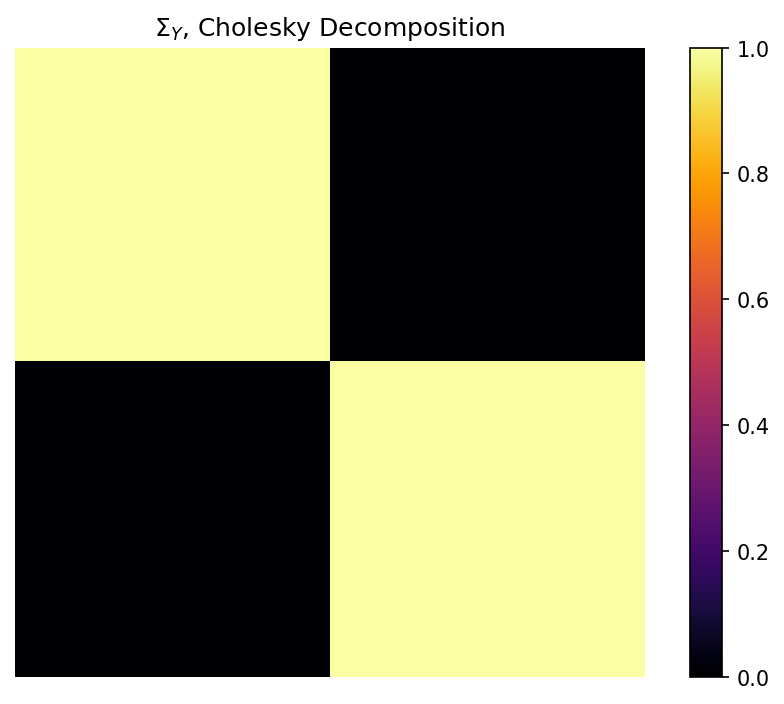

In [31]:
plot_cov(cov_Y_cholesky, title="$\Sigma_Y$, Cholesky Decomposition")

### Singular Value Decomposition

Our data matrix $\mathbb{X}$ can be decomposed into

## $\mathbb{X} = \mathbb{U} \cdot \mathbb{S} \cdot \mathbb{V}^*$

with the unitary matrix $\mathbb{U}$ of shape $\left(m \times m\right)$, the diagonal matrix $\mathbb{S}$ of shape $\left( m \times n \right)$, and the unitary matrix $\mathbb{V}$ of shape $\left( n \times n \right)$.

The covariance matrix can then be written as

## $\Sigma_X = \frac{\mathbb{X}^\intercal \cdot \mathbb{X}}{N-1} = \frac{\left( \mathbb{U} \cdot \mathbb{S} \cdot \mathbb{V}^\intercal \right)^\intercal \cdot \mathbb{U} \cdot \mathbb{S} \cdot \mathbb{V}^\intercal}{N-1} = \frac{\mathbb{V} \cdot \mathbb{S}^\intercal \cdot \mathbb{U}^\intercal \cdot \mathbb{U} \cdot \mathbb{S} \cdot \mathbb{V}^\intercal}{N-1} = \mathbb{V} \cdot \frac{\mathbb{S}^2}{N-1} \cdot \mathbb{V}^\intercal$

This is very similar to the equation we have derived above.

$\mathbb{V}$ are the principal directions and $\mathbb{U} \cdot \mathbb{S}$ the principal components. SVD is no unique. The entires $\mathbb{S}$ is usually chosen to be in descending order.

For this we can use `numpy.linalg.svd`. Again, remeber, that our data is transposed.

In [32]:
U, S, Vh = np.linalg.svd(X_shift)

We can use $\mathbb{V}$ to transform our data in the new reference frame.

In [33]:
Y_svd = X_shift @ Vh.T

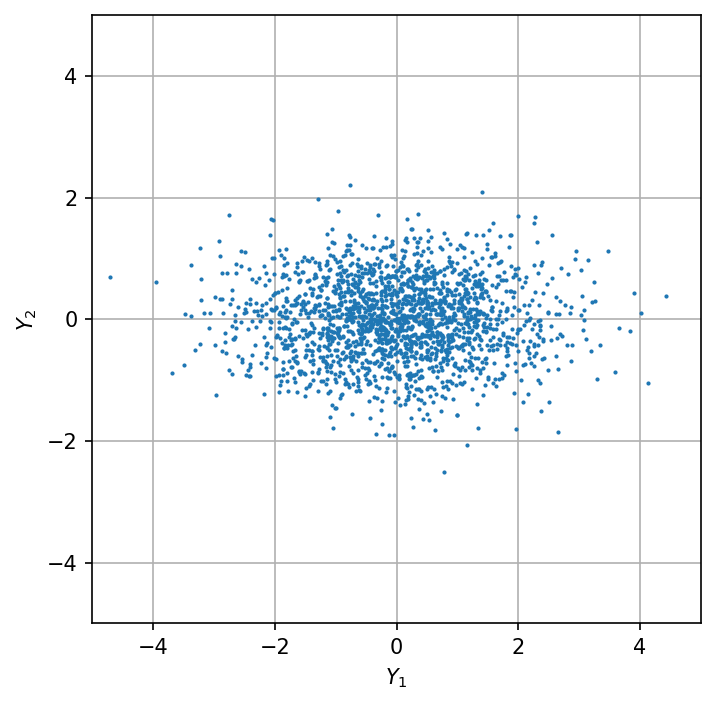

In [34]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_svd[:, 0], Y_svd[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
fig.tight_layout()

In this reference frame the covariance matrix is diagonal.

In [35]:
cov_Y_svd = Y_svd.T @ Y_svd / (N-1)

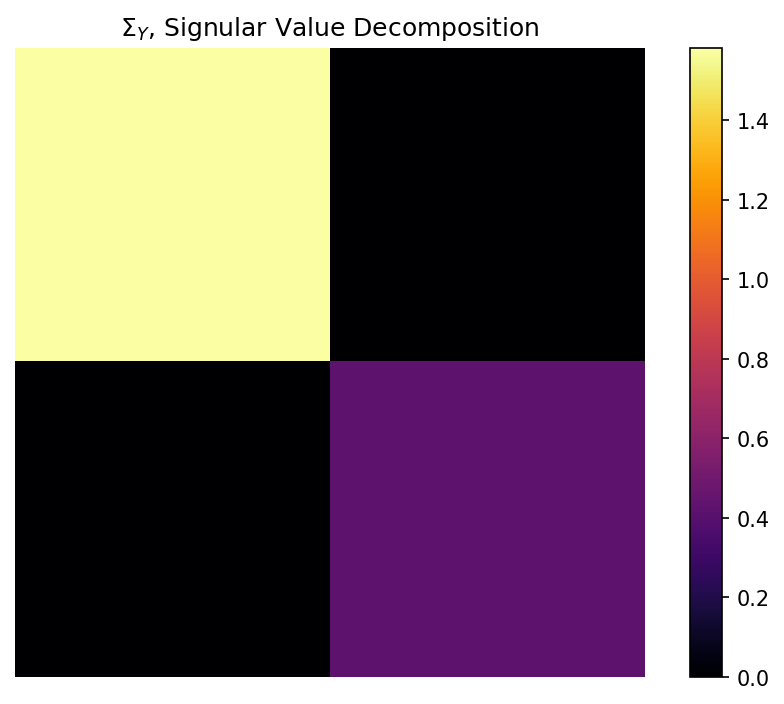

In [36]:
plot_cov(cov_Y_svd, title="$\Sigma_Y$, Signular Value Decomposition")

As above, we can scale $\mathrm{V}$ such that the covariance matrix is the identity matrix using $\mathrm{S}$.

In [37]:
Y_svd_whitened = X_shift @ Vh.T @ np.diag(1./S * np.sqrt(N-1))

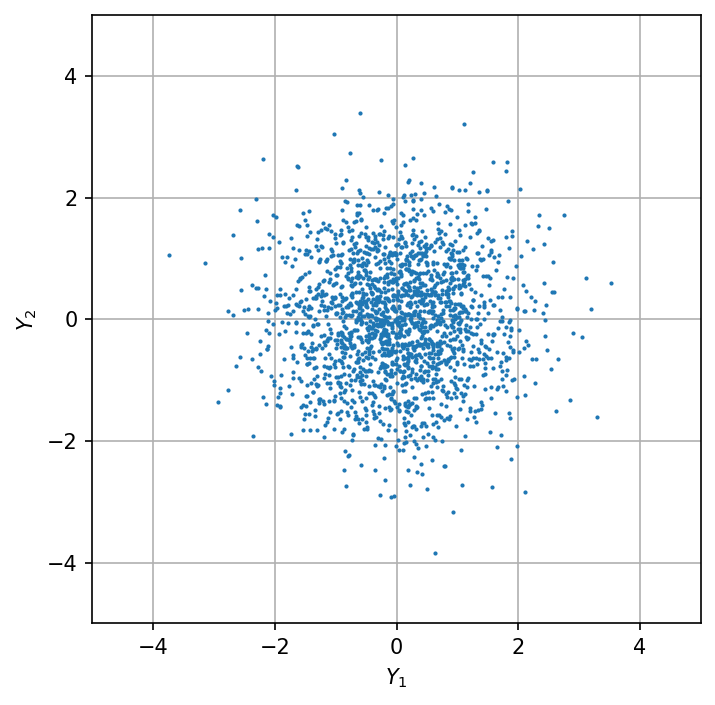

In [38]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_svd_whitened[:, 0], Y_svd_whitened[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
fig.tight_layout()

And we can confirm that the covariance matrix is indeed the identity matrix.

In [39]:
cov_Y_svd_whitened = Y_svd_whitened.T @ Y_svd_whitened / (N-1)

In [40]:
msg = "## " + r"$\Sigma_Y = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov_Y_svd_whitened[0, 0], C2=cov_Y_svd_whitened[0, 1], C3=cov_Y_svd_whitened[1, 0], C4=cov_Y_svd_whitened[1, 1])
md(msg)

## $\Sigma_Y = \left[ \begin{matrix} 1.0 & 0.0 \\ 0.0 & 1.0 \end{matrix} \right]$

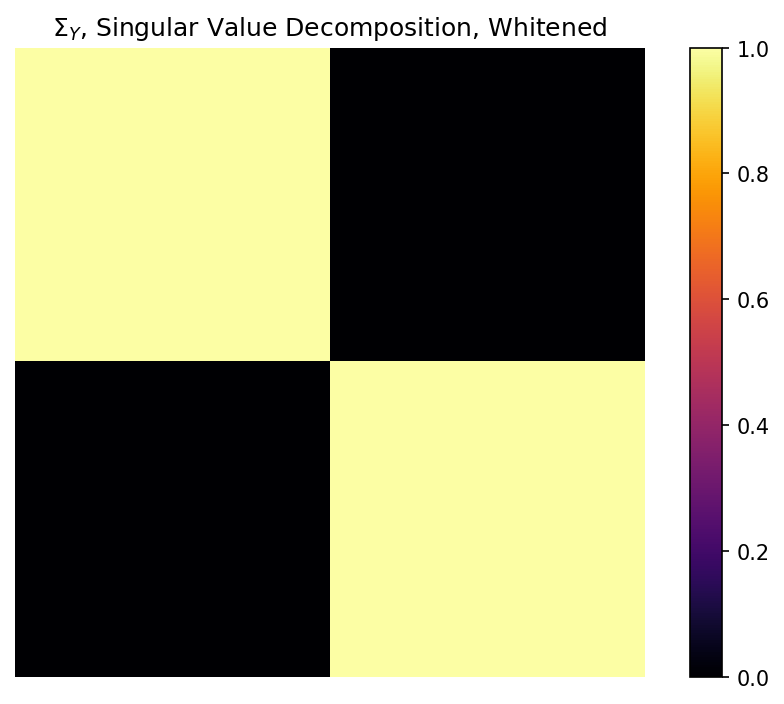

In [41]:
plot_cov(cov_Y_svd_whitened, title="$\Sigma_Y$, Singular Value Decomposition, Whitened")

Please note, that all three whitening methods are not identical.

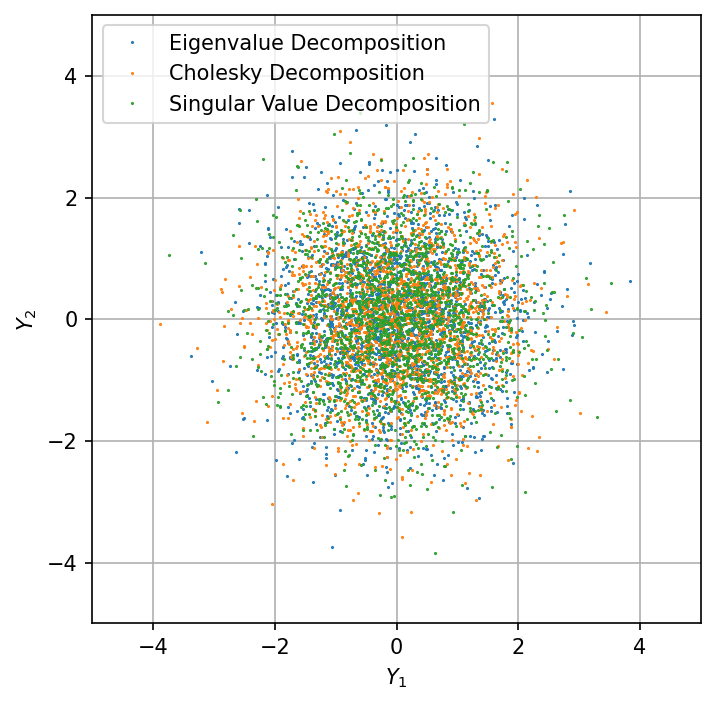

In [42]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_eig_whitened[:, 0], Y_eig_whitened[:, 1], ".", markersize=1, label="Eigenvalue Decomposition")
ax.plot(Y_cholesky[:, 0], Y_cholesky[:, 1], ".", markersize=1, label="Cholesky Decomposition")
ax.plot(Y_svd_whitened[:, 0], Y_svd_whitened[:, 1], ".", markersize=1, label="Singular Value Decomposition")
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")
ax.grid()
ax.legend()
fig.tight_layout()

On a sidenote:  
In the eigenvalue decomposition, the eigenvalues are not ordered. If we order the eigenvalues and the columns of the transformation matrix accordingly, eigenvalue decomposition and singular value decomposition give the same results.

This is also how the principal component analysis works.

In [43]:
L_pca, E_pca = np.linalg.eig(cov_X)

In [44]:
idx = L_pca.argsort()[::-1]   
L_pca = L_pca[idx]
E_pca = E_pca[:, idx]

In [45]:
diag = np.diag((1./np.sqrt(L_pca))) 
diag[0, 0] *= -1
#diag[1, 1] *= -1

In [46]:
E_pca_whitened = E_pca @ diag

In [47]:
Y_pca_whitened = (X_shift @ E_pca_whitened)

In [48]:
np.allclose(Y_svd_whitened, Y_pca_whitened)

False

## Dimensionality Reduction

Often it is necessary to reduce the dimensionality of the problem to make it feasible to analyze.

### Principal Component Analysis

Principal component analysis can be used for this by ignoring the least significant components.

The demonstrate this we are going to use the ordered eigenvalue decomposition show above.

In [49]:
L_pca, E_pca = np.linalg.eig(cov_X)
idx = L_pca.argsort()[::-1]   
L_pca = L_pca[idx]
E_pca = E_pca[:, idx]

In [50]:
Y_pca = X_shift @ E_pca

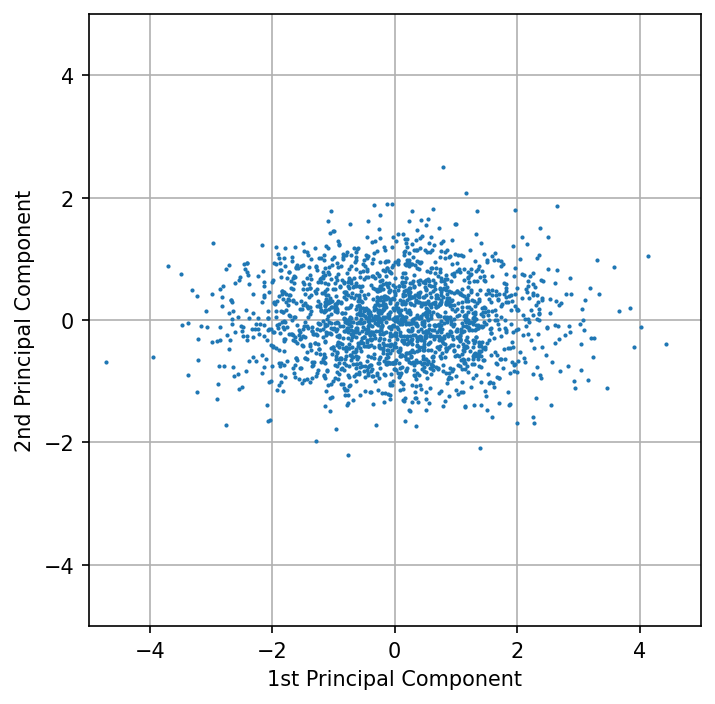

In [51]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_pca[:, 0], Y_pca[:, 1], ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.grid()
fig.tight_layout()

Remember that the covariance matrix in this reference frame is diagonal. The components on the diagonal are the variances of the data along the axes in the new reference frame.

In [52]:
cov_Y_pca = Y_pca.T @ Y_pca / (N-1)

In [53]:
msg = "## " + r"$\Sigma_Y = \left[ \begin{{matrix}} {C1:3.1f} & {C2:3.1f} \\ {C3:3.1f} & {C4:3.1f} \end{{matrix}} \right]$".format(C1=cov_Y_pca[0, 0], C2=cov_Y_pca[0, 1], C3=cov_Y_pca[1, 0], C4=cov_Y_pca[1, 1])
md(msg)

## $\Sigma_Y = \left[ \begin{matrix} 1.6 & 0.0 \\ 0.0 & 0.4 \end{matrix} \right]$

In [54]:
msg = "In other words: {:3.0f}% of the total variance in our data is exaplined by the 1st component, and {:3.0f}% in the second component.".format(np.diag(cov_Y_pca)[0]/cov_Y_pca.sum()*100, np.diag(cov_Y_pca)[1]/cov_Y_pca.sum()*100)
md(msg)

In other words:  79% of the total variance in our data is exaplined by the 1st component, and  21% in the second component.

If we are fine with the variance in the first component, we can simply ignore the second component. This can be achieved by ignoring the second column in the eigenvector matrix $\mathbb{E}$.

In [55]:
E_pca_red = E_pca @ np.diag([1., 0])

We can use this tranformation matrix with reduced dimensionality to transform our data back into the original reference frame.

In [56]:
X_red = Y_pca @ E_pca_red.T + X_mean

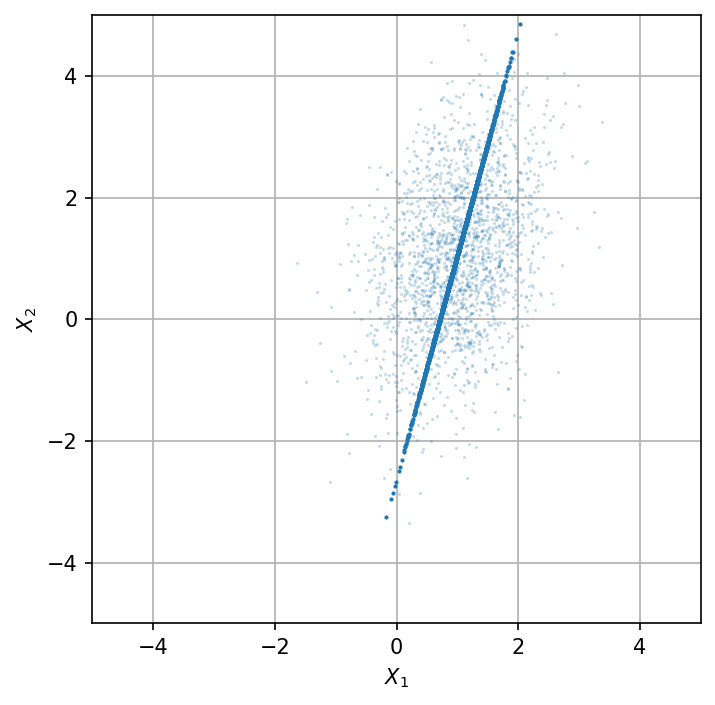

In [57]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(X[:, 0], X[:, 1], ".", markersize=1, c="C0", alpha=0.25)
ax.plot(X_red[:, 0], X_red[:, 1], ".", markersize=2, c="C0")
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.grid()
fig.tight_layout()

`sklearn` has routines that are doing principal component analysis for us using the singular value decomposition as discussed above.

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(
    n_components=1, # Only keep one component
)

In [60]:
Y_pca_skl = pca.fit_transform(X)

Our data has only one dimension now.

In [61]:
Y_pca_skl.shape[-1]

1

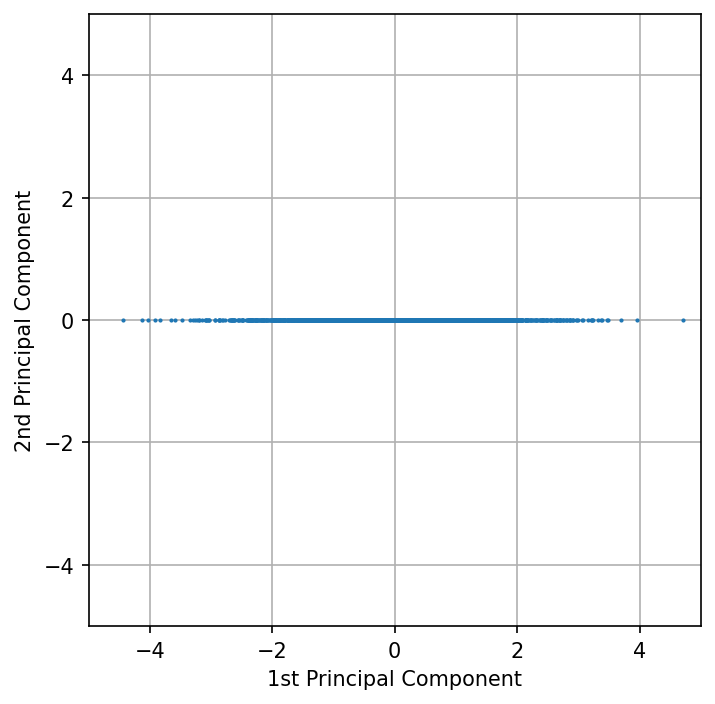

In [62]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(Y_pca_skl[:], np.zeros(N), ".", markersize=2)
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.grid()
fig.tight_layout()

We can transform this back into our original reference frame.

In [63]:
X_red_skl = pca.inverse_transform(Y_pca_skl)

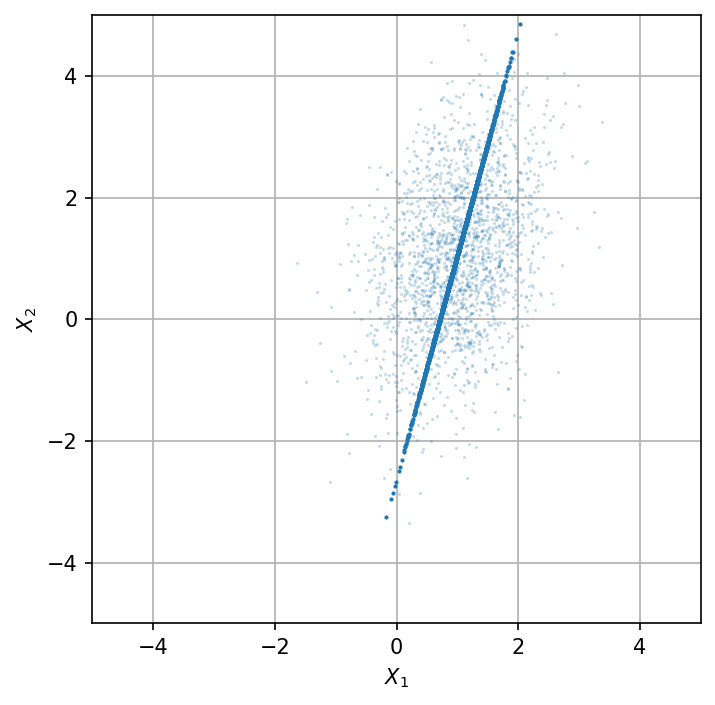

In [64]:
fig = plt.figure(dpi=150.)
ax = fig.add_subplot(111, aspect=1)
ax.plot(X[:, 0], X[:, 1], ".", markersize=1, c="C0", alpha=0.25)
ax.plot(X_red_skl[:, 0], X_red_skl[:, 1], ".", markersize=2, c="C0")
ax.set_xlim(-5., 5.)
ax.set_ylim(-5., 5.)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.grid()
fig.tight_layout()